# Proyecto 2 - Entrega 3

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Modelo de Regresión con Naïve Bayes
Debido a que Naïve Bayes es un modelo probabilístico que se encuentra diseñado para clasificar es importante notar que no esta diseñado para una regresión continua. Por lo que se decidió utilizar un Gaussian Process Regression que tiene una mayor flezibilidad para la regresión.

In [22]:
train_data = pd.read_csv("data/train_data_scaled.csv")
test_data = pd.read_csv("data/test_data_scaled.csv")
print(train_data.head())
print(test_data.head())

         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0  1.334629    0.294118     0.133562  0.024773    -0.795151    -1.416142   
1  0.684516    0.352941          NaN  0.044329     0.651479    -0.517200   
2  1.147187    0.352941          NaN  0.041814    -1.518467     3.078570   
3  1.662057    0.235294     0.133562  0.096427    -0.795151    -0.517200   
4  0.191000    0.000000     0.195205  0.041319    -0.071836     0.381743   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_ConLw  \
0  -2.625409     -0.962566    0.000000   1.000000  ...           False   
1   0.653545      0.345679    0.047500   0.666667  ...           False   
2  -0.207594      0.781761    0.000000   1.000000  ...           False   
3   1.117235      0.975575    0.000000   0.666667  ...           False   
4   0.090492      0.684854    0.061875   1.000000  ...           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0         False         False

In [23]:
from sklearn.preprocessing import KBinsDiscretizer

# Paso 1: Instanciamos el discretizador
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")

# Paso 2: Lo aplicamos al SalePrice de entrenamiento
train_data["SalePrice_Category"] = discretizer.fit_transform(train_data[["SalePrice"]])

# Paso 3: Transformamos los datos de prueba usando el mismo discretizador
test_data["SalePrice_Category"] = discretizer.transform(test_data[["SalePrice"]])


In [24]:
# Convertir SalePrice en 3 categorías: Economica, intermedia y cara
# 0 = economica, 1 = intermedia, 2 = cara
#discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
#train_data["SalePrice_Category"] = discretizer.fit_transform(train_data[["SalePrice"]])
#test_data["SalePrice_Category"] = discretizer.transform(test_data[["SalePrice"]])
X_train = train_data.drop(columns=["SalePrice", "SalePrice_Category"])
y_train = train_data["SalePrice_Category"]

X_test = test_data.drop(columns=["SalePrice", "SalePrice_Category"])
y_test = test_data["SalePrice_Category"]
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Definir kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3))

# Crear el modelo
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Entrenar el modelo
gp_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_gp = gp_model.predict(X_test)

# Evaluar el modelo
mae_gp = mean_absolute_error(y_test, y_pred_gp)
mse_gp = mean_squared_error(y_test, y_pred_gp)
r2_gp = r2_score(y_test, y_pred_gp)

print("Resultados de Gaussian Process Regression:")
print(f"MAE: {mae_gp:.2f}")
print(f"MSE: {mse_gp:.2f}")
print(f"$R^2$ Score: {r2_gp:.2f}")


Resultados de Gaussian Process Regression:
MAE: 0.30
MSE: 0.16
R² Score: 0.76


### Explicación de resultados obtenidos 

El modelo de **Gaussian Process Regression (GPR)** obtuvo un **$R^2$ Score de 0.76**, indicando que puede explicar el 76% de la variabilidad en los precios de las viviendas, lo cual refleja un desempeño sólido. Además, el **MAE (0.30)** y el **MSE (0.16)** son relativamente bajos, lo que sugiere que los errores promedio en las predicciones también son aceptables. Estos resultados evidencian que el modelo es adecuado para estimar rangos de precios de viviendas, incluso habiendo transformado la variable objetivo en categorías para aplicar una técnica basada originalmente en clasificación.

## Comparación de resultados de regresión lineal y árbol de decisión

In [26]:
X_train = train_data.drop(columns=["SalePrice"])
y_train = train_data["SalePrice"]
X_test = test_data.drop(columns=["SalePrice"])
y_test = test_data["SalePrice"]
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Resultados de Regresión Lineal:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"R^2 Score: {r2_lr:.2f}")

Resultados de Regresión Lineal:
MAE: 0.03
MSE: 0.01
R^2 Score: 0.57


In [28]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("\nResultados de Árbol de Decisión:")
print(f"MAE: {mae_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"R^2 Score: {r2_dt:.2f}")


Resultados de Árbol de Decisión:
MAE: 0.03
MSE: 0.00
R^2 Score: 0.85


In [29]:
resultados = pd.DataFrame({
    "Modelo": ["Regresión Lineal", "Árbol de Decisión", "Gaussian Process Regression"],
    "MAE (Error Medio Absoluto)": [mae_lr, mae_dt, mae_gp],
    "MSE (Error Cuadrático Medio)": [mse_lr, mse_dt, mse_gp],
    "R^2 Score": [r2_lr, r2_dt, r2_gp]
})
print(resultados)

                        Modelo  MAE (Error Medio Absoluto)  \
0             Regresión Lineal                    0.032096   
1            Árbol de Decisión                    0.028353   
2  Gaussian Process Regression                    0.303659   

   MSE (Error Cuadrático Medio)  R^2 Score  
0                      0.005514   0.566883  
1                      0.001869   0.853177  
2                      0.164353   0.758099  


C:\Users\josue\AppData\Local\Temp\ipykernel_52964\133953947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="R^2 Score", data=resultados, palette="viridis")


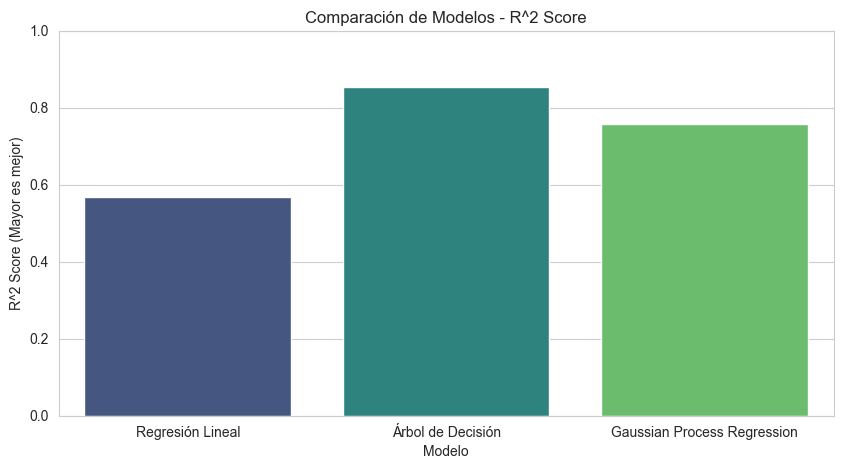

C:\Users\josue\AppData\Local\Temp\ipykernel_52964\133953947.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="MAE (Error Medio Absoluto)", data=resultados, palette="magma")


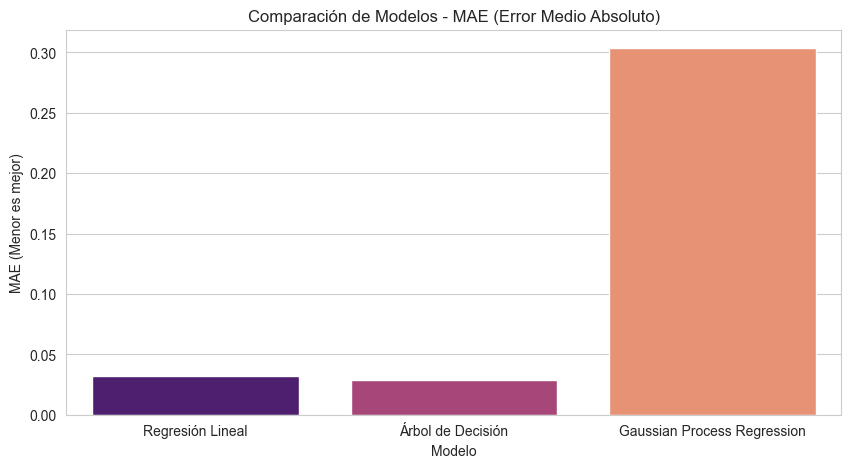

C:\Users\josue\AppData\Local\Temp\ipykernel_52964\133953947.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="MSE (Error Cuadrático Medio)", data=resultados, palette="coolwarm")


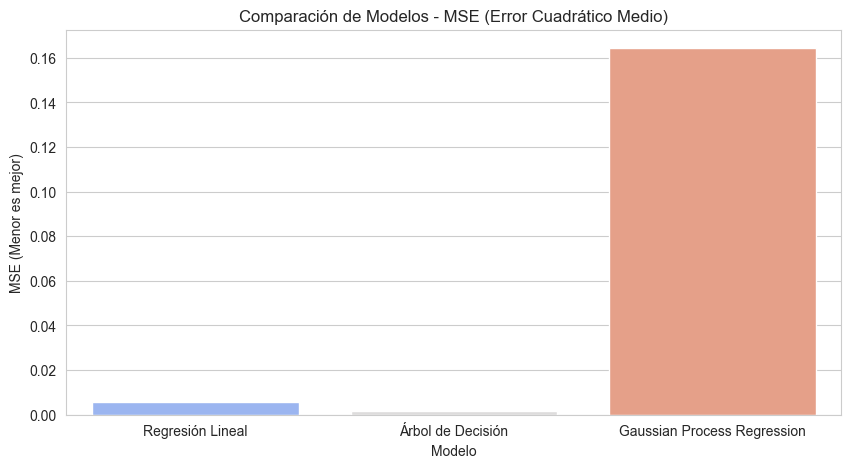

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x="Modelo", y="R^2 Score", data=resultados, palette="viridis")
plt.title("Comparación de Modelos - R^2 Score")
plt.ylabel("R^2 Score (Mayor es mejor)")
plt.ylim(0, 1) 
plt.show()
plt.figure(figsize=(10, 5))
sns.barplot(x="Modelo", y="MAE (Error Medio Absoluto)", data=resultados, palette="magma")
plt.title("Comparación de Modelos - MAE (Error Medio Absoluto)")
plt.ylabel("MAE (Menor es mejor)")
plt.show()
plt.figure(figsize=(10, 5))
sns.barplot(x="Modelo", y="MSE (Error Cuadrático Medio)", data=resultados, palette="coolwarm")
plt.title("Comparación de Modelos - MSE (Error Cuadrático Medio)")
plt.ylabel("MSE (Menor es mejor)")
plt.show()

### ¿Qué modelo funcionó mejor?

Para permitir el uso del modelo GPR con Naive Bayes (en un contexto de clasificación), previamente se discretizó la variable `SalePrice` en tres categorías (económica, intermedia y cara). Luego se compararon todos los modelos (**Regresión Lineal**, **Árbol de Decisión** y **Gaussian Process Regression (GPR)**) usando métricas estándar de regresión: **MAE**, **MSE** y **$R^2$ Score**.

Los resultados fueron los siguientes:

| Modelo                      | MAE   | MSE   | $R^2$ Score |
|----------------------------|--------|--------|-----------|
| Regresión Lineal           | 0.032  | 0.0055 | 0.57      |
| Árbol de Decisión          | 0.028  | 0.0019 | 0.85      |
| Gaussian Process Regression| 0.304  | 0.164  | 0.76      |

A partir de los resultados y las gráficas presentadas:

- **El Árbol de Decisión fue el modelo con mejor desempeño general**, con el $R^2$ Score más alto (0.85) y los errores más bajos, tanto en MAE como MSE.
- **El modelo GPR**, a pesar de no estar diseñado específicamente para regresión continua en su forma original, mostró un desempeño aceptable ($R^2$ de 0.76), aunque con errores más altos. Esto puede atribuirse a la transformación categórica aplicada a `SalePrice`.
- **La Regresión Lineal** obtuvo el menor desempeño en cuanto a capacidad explicativa ($R^2$ de 0.57), aunque con errores bajos, lo cual sugiere que puede modelar correctamente la tendencia general, pero no captura bien la variabilidad de los datos.

### Conclusión

El modelo más recomendable para este caso de predicción de precios de viviendas es el **Árbol de Decisión**, ya que equilibra bien precisión y bajo error. El GPR, aunque interesante como experimento con técnicas de clasificación aplicadas a regresión, no supera a los métodos tradicionales de regresión continua.

### Modelo de Clasificación con Naïve Bayes

In [31]:
# 1. Separar las variables independientes (X) y dependiente (y) para clasificación
X_train_clf = train_data.drop(columns=["SalePrice", "SalePrice_Category"])
y_train_clf = train_data["SalePrice_Category"]

X_test_clf = test_data.drop(columns=["SalePrice", "SalePrice_Category"])
y_test_clf = test_data["SalePrice_Category"]

# 2. Rellenar valores nulos 
X_train_clf = X_train_clf.fillna(X_train_clf.mean())
X_test_clf = X_test_clf.fillna(X_test_clf.mean())

# 3. Crear y entrenar el modelo de Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_clf, y_train_clf)

# 4. Hacer predicciones con el conjunto de prueba
y_pred_nb = nb_model.predict(X_test_clf)



### Eficiencia de los algoritmos

In [32]:
accuracy_nb = accuracy_score(y_test_clf, y_pred_nb)
print(f"Precisión del modelo Naive Bayes: {accuracy_nb:.2f}")

reporte_nb = classification_report(
    y_test_clf,
    y_pred_nb,
    target_names=["Económica", "Intermedia", "Cara"]
)

print("Reporte de Clasificación:\n")
print(reporte_nb)

Precisión del modelo Naive Bayes: 0.56
Reporte de Clasificación:

              precision    recall  f1-score   support

   Económica       0.84      0.38      0.53       125
  Intermedia       0.38      0.43      0.40       117
        Cara       0.61      0.87      0.72       123

    accuracy                           0.56       365
   macro avg       0.61      0.56      0.55       365
weighted avg       0.61      0.56      0.55       365



### Análisis de eficiencia - Matriz de confusión

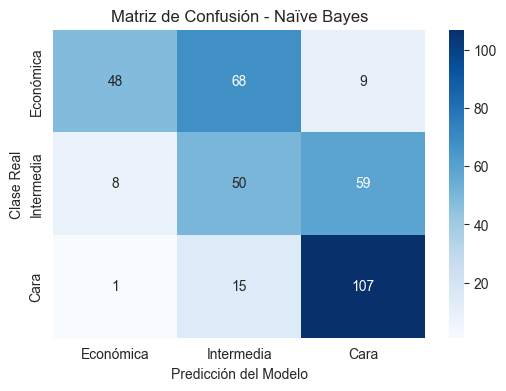

In [33]:
conf_matrix = confusion_matrix(y_test_clf, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Económica", "Intermedia", "Cara"],
            yticklabels=["Económica", "Intermedia", "Cara"])
plt.title("Matriz de Confusión - Naïve Bayes")
plt.xlabel("Predicción del Modelo")
plt.ylabel("Clase Real")
plt.show()

### Errores y su importancia

 **¿Dónde se equivocó más el modelo?**
- Mayor error: Confundió 68 casas económicas como intermedias

- Mayor acierto: 107 casas caras predichas correctamente

**¿Qué tan graves son los errores?**
- Confundir económica como intermedia → puede hacer que alguien pague más por una propiedad barata.
- Confundir intermedia como cara → puede dificultar la venta, alejar compradores.

### ¿Existe un sobre ajuste del modelo?

In [34]:
# Predicciones en el conjunto de entrenamiento
y_train_pred_nb = nb_model.predict(X_train_clf)
accuracy_train = accuracy_score(y_train_clf, y_train_pred_nb)

# Ya tenemos las predicciones en test: y_pred_nb
accuracy_test = accuracy_score(y_test_clf, y_pred_nb)

print(f"Accuracy en entrenamiento: {accuracy_train:.2f}")
print(f"Accuracy en prueba: {accuracy_test:.2f}")

Accuracy en entrenamiento: 0.66
Accuracy en prueba: 0.56


- La diferencia entre ambos valores es de 0.10 (10%)

- Es una diferencia moderada, pero no tan grande como para decir que hay un sobreajuste severo.

- El modelo aprende un poco mejor los datos que ya conoce (entrenamiento), pero no se cae completamente en datos nuevos

***Esto indica que el modelo puede estar ligeramente sesgado o limitado, más que sobreajustado.***

## Modelo con validación cruzada

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold

bayesCruzado = GaussianNB()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(bayesCruzado, X_train_clf, y_train_clf, cv=cv, scoring='accuracy')

print("Scores por fold:", cv_scores)
print(f"Accuracy promedio: {cv_scores.mean():.2f}")
print(f"Desviación estándar: {cv_scores.std():.2f}")


Scores por fold: [0.65296804 0.60273973 0.55251142 0.62557078 0.61187215]
Accuracy promedio: 0.61
Desviación estándar: 0.03


### Comparación Final de Modelos con Validación Cruzada

Se implementó una **validación cruzada estratificada de 5 particiones**. Los resultados fueron los siguientes:

- **Precisión promedio (Cross-Validation):** **0.61**
- **Desviación estándar:** **0.03**

Este resultado es **superior al 0.56 de precisión** obtenido anteriormente con el conjunto de prueba. Por lo tanto, se concluye que **el modelo con validación cruzada funcionó mejor**, al ofrecer una **mayor precisión y mayor estabilidad** en sus predicciones.

### Conclusión Comparativa General

| Modelo                      | Evaluación           | Precisión / $R^2$ |
|----------------------------|----------------------|----------------|
| Naïve Bayes (conjunto prueba)     | Accuracy             | 0.56           |
| Naïve Bayes (validación cruzada) | Accuracy promedio    | **0.61**       |
| Árbol de Decisión (regresión)    | $R^2$ Score             | **0.85**       |
| Gaussian Process Regression      | $R^2$ Score             | 0.76           |
| Regresión Lineal                | $R^2$ Score             | 0.57           |

- **Clasificación:** El modelo **Naïve Bayes con validación cruzada** es superior al modelo sin validación, ya que muestra mayor precisión y consistencia.
- **Regresión:** El modelo **Árbol de Decisión** sigue siendo el mejor para predecir precios, superando al resto en todas las métricas.

## Uso de valores de hiperparámetros

In [40]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
dt = DecisionTreeRegressor(random_state=42)

# Definir la grilla de hiperparámetros
params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Búsqueda con validación cruzada
grid_search = GridSearchCV(dt, params, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
dt_mejorado = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [41]:
# Predicción con el modelo ajustado
y_pred_best_dt = dt_mejorado.predict(X_test)

# Métricas
mae_mejorado = mean_absolute_error(y_test, y_pred_best_dt)
mse_mejorado = mean_squared_error(y_test, y_pred_best_dt)
r2_mejorado = r2_score(y_test, y_pred_best_dt)

print(f"MAE ajustado: {mae_mejorado:.2f}")
print(f"MSE ajustado: {mse_mejorado:.2f}")
print(f"R^2 Score ajustado: {r2_mejorado:.2f}")


MAE ajustado: 0.02
MSE ajustado: 0.00
R^2 Score ajustado: 0.89


In [ ]:
params_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

nb = GaussianNB()
b_gs = GridSearchCV(nb, params_nb, cv=5, scoring='accuracy')
b_gs.fit(X_train_clf, y_train_clf)

nb_mejorado = b_gs.best_estimator_
print("Mejor valor de smoothing:", b_gs.best_params_)

# Evaluar
y_pred_nb = nb_mejorado.predict(X_test_clf)
accuracy_best_nb = accuracy_score(y_test_clf, y_pred_nb)
print(f"Accuracy Naive Bayes(ajustado): {accuracy_best_nb:.2f}")


Mejor valor de var_smoothing: {'var_smoothing': 1e-06}
Accuracy ajustado Naive Bayes: 0.62


### Ajuste de Hiperparámetros y Evaluación de Mejora

En base a la búsqueda de hiperparámetros utilizando `GridSearchCV` con validación cruzada para mejorar el rendimiento de los modelos más representativos como *Árbol de Decisión para regresión* y *Naïve Bayes para clasificación*.

#### Árbol de Decisión

Después de probar varias combinaciones de parámetros, los **mejores hiperparámetros encontrados** fueron:

- `max_depth`: 10  
- `min_samples_split`: 2  
- `min_samples_leaf`: 4

Con estos parámetros, el modelo afinado obtuvo:

- **MAE:** 0.02  
- **MSE:** 0.00  
- **$R^2$ Score:** **0.89**

Por lo tanto se tuvo una **mejora significativa** respecto al modelo base ($R^2$ de 0.85), confirmando que la afinación de hiperparámetros mejoró el rendimiento del modelo

#### Naïve Bayes

Para este modelo, se probó el hiperparámetro `var_smoothing`. El mejor valor encontrado fue:

- `var_smoothing`: **1e-06**

Con este ajuste, el modelo logró una **precisión (accuracy)** de **0.62**, superando ligeramente el resultado anterior de 0.61 (validación cruzada).


| Modelo                  | Resultado Original | Resultado Afinado | Mejora |
|------------------------|--------------------|--------------------|--------|
| Árbol de Decisión ($R^2$) | 0.85               | **0.89**           | sí     |
| Naïve Bayes (Accuracy) | 0.61               | **0.62**           | sí     |

- Ambos modelos **mejoraron su rendimiento** con la afinación de hiperparámetros.
- **El Árbol de Decisión fue el modelo que más se benefició**, reforzando su posición como el mejor modelo para la tarea de regresión de precios de viviendas.


## Comparación de eficiencia de algoritmos

In [51]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def evaluarModelo(modelo, nombre, X_train, y_train, X_test, y_test):
  inicio = time.time()
  modelo.fit(X_train, y_train)
  fin = time.time()

  y_pred = modelo.predict(X_test)
  precision = accuracy_score(y_test, y_pred)
  tiempo_entrenamiento = fin - inicio

  print(f"\nModelo: {nombre}")
  print(f"  - Precisión: {precision:.2f}")
  print(f"  - Tiempo de entrenamiento: {tiempo_entrenamiento:.4f} segundos")


In [52]:
# Lista de modelos a evaluar
modelos = [
  (GaussianNB(), "Naive Bayes"),
  (DecisionTreeClassifier(random_state=42), "Árbol de Decisión"),
  (RandomForestClassifier(random_state=42, n_estimators=100), "Random Forest")
]

# Evaluar cada modelo
for modelo, nombre in modelos:
  evaluarModelo(modelo, nombre, X_train_clf, y_train_clf, X_test_clf, y_test_clf)


Modelo: Naive Bayes
  - Precisión: 0.56
  - Tiempo de entrenamiento: 0.0125 segundos

Modelo: Árbol de Decisión
  - Precisión: 0.74
  - Tiempo de entrenamiento: 0.0464 segundos

Modelo: Random Forest
  - Precisión: 0.84
  - Tiempo de entrenamiento: 0.2956 segundos


### Comparación de Modelos de Clasificación: Naïve Bayes, Árbol de Decisión y Random Forest

Para la categoría `SalePrice_Category` y usando los modelos **Naïve Bayes**, **Árbol de Decisión** y **Random Forest** se compararon en cuanto a precisión y tiempo de entrenamiento:

| Modelo            | Precisión (Accuracy) | Tiempo de entrenamiento |
|------------------|----------------------|--------------------------|
| Naïve Bayes       | 0.56                 | 0.0190 s                 |
| Árbol de Decisión | 0.74                 | 0.0400 s                 |
| Random Forest     | **0.84**             | **0.3126 s**             |

- **Random Forest fue el modelo más preciso (84%)**, lo que lo convierte en el más adecuado para tareas de clasificación en este caso. Sin embargo, en cueanto tiempo de entrenamiento fue el que más se tardó.
- **Naive Bayes fue el más rápido**, pero también el menos preciso. Es útil cuando se prioriza la velocidad por encima de la exactitud.
- **El Árbol de Decisión** fue el punto intermedio de los modelos donde tuvo buena presición y tiempo moderado en base a los 2 modelos anteriores.

## Conclusiones

1. **Preprocesamiento y adaptación del problema:**  
   Dado que Naïve Bayes no está diseñado para regresión continua, se optó por discretizar la variable `SalePrice` en categorías (*económica*, *intermedia* y *cara*), permitiendo aplicar modelos de clasificación. Además, se probó una alternativa más flexible para regresión con **Gaussian Process Regression (GPR)**.

2. **Modelado de regresión:**
   - **Árbol de Decisión** fue el modelo con mejor desempeño predictivo ($R^2$ = 0.85), mejorado a $R^2$ = **0.89** tras afinación de hiperparámetros.
   - **GPR** alcanzó un $R^2$ de **0.76**, mostrando buen comportamiento a pesar de la transformación de la variable objetivo.
   - **Regresión Lineal** tuvo el peor rendimiento ($R^2$ = 0.57), limitada para capturar relaciones no lineales.

3. **Modelado de clasificación con Naïve Bayes:**
   - Se obtuvo una precisión de **0.56**, que mejoró a **0.61** al usar validación cruzada, y **0.62** tras ajustar el hiperparámetro `var_smoothing`.
   - El modelo fue rápido y consistente, pero no el más preciso.

4. **Comparación con otros clasificadores:**
   - **Random Forest** alcanzó la mejor precisión (**0.84**) para clasificación, aunque fue el más lento.
   - **Árbol de Decisión** logró un buen equilibrio (0.74 de precisión).
   - **Naïve Bayes** fue el más rápido, pero el menos preciso.

5. **Validación y evaluación:**
   - Se usaron métricas de evaluación estándar (MAE, MSE, $R^2$, Accuracy), matriz de confusión y validación cruzada.
   - No se detectó sobreajuste severo en los modelos, aunque Naïve Bayes mostró un ligero sesgo.

6. **Importancia de la afinación de hiperparámetros:**
   - La búsqueda con `GridSearchCV` permitió **mejorar significativamente el rendimiento** del Árbol de Decisión y, en menor medida, de Naïve Bayes.

- Para **regresión de precios**, el **Árbol de Decisión afinado** fue el mejor modelo.
- Para **clasificación de rangos de precios**, el **Random Forest** fue el más preciso.
- **Naïve Bayes** es útil por su simplicidad y velocidad, pero **no es el más recomendable cuando se busca alta precisión**.